In [5]:
# Dependencies
import requests
import pandas as pd
import json
from pprint import pprint
from citipy import citipy
from random import uniform
import matplotlib.pyplot as plt

# Google developer API key
from apikeys import api_key as gkey

In [6]:
# geocoordinates

def newpoint():
    return uniform(-90.0,90.0), uniform(-180.0,180.0)

coordinates = []
points = (newpoint() for x in range(10))
for point in points:
    coordinates.append(point)
    
coordinates

[(-67.77320138694857, 98.16903879224196),
 (16.336959848093628, -75.78869888540336),
 (88.42197319932157, -131.228085525389),
 (-11.887385573968487, -51.888774722211906),
 (-4.662482972331958, -110.14463093185424),
 (-28.078625971384078, -32.96971576496537),
 (14.652639751449158, -49.51963961822548),
 (34.057755208413354, 81.20632772495941),
 (61.20891642512322, -152.99215418964368),
 (0.34829133265532164, 50.78698634026145)]

In [7]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append((citipy.nearest_city(lat, lon).city_name))
    
cities

['busselton',
 'morant bay',
 'tuktoyaktuk',
 'sao miguel do araguaia',
 'puerto ayora',
 'sao joao da barra',
 'sinnamary',
 'leh',
 'kenai',
 'hobyo']

In [8]:
# list for response results
lat = []
temp = []
humidity = []
clouds = []
wind = []

api_params = {
    'appid': gkey,
    'units': 'imperial',
}

# Build URL
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Get weather information in JSON format
for city in cities:
#    print(city)
    api_params['q']=city
    weather_response = requests.get(base_url, params=api_params).json()
    
    lat.append(weather_response['coord']['lat'])
    temp.append(weather_response['main']['temp'])
    humidity.append(weather_response['main']['humidity'])
    clouds.append(weather_response['clouds']['all'])
    wind.append(weather_response['wind']['speed'])


# build a dataframe from the cities, lat, Temperature, Humidity (%), Cloudiness (%),Wind Speed (mph) lists
weather_data = {"City": cities, "Latitude": lat, "Temperature (F)": temp, "Humidity (%)": humidity, "Cloudiness (%)": clouds, "Wind Speed (mph)": wind}
df_weather_data = pd.DataFrame(weather_data)
df_weather_data.head()

,City,Cloudiness (%),Humidity (%),Latitude,Temperature (F),Wind Speed (mph)
0,busselton,76,100,-33.64,59.85,15.68
1,morant bay,20,70,17.88,87.80,21.92
2,tuktoyaktuk,40,66,69.44,55.40,11.41
3,sao miguel do araguaia,0,75,-13.28,82.26,8.08
4,puerto ayora,20,65,-0.74,80.60,12.75


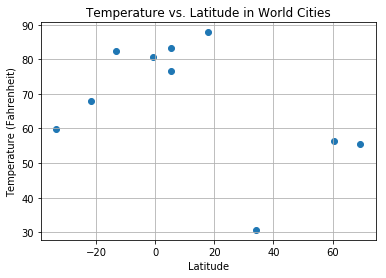

In [11]:
# Build a scatter plot for each data type
plt.scatter(df_weather_data["Latitude"], df_weather_data["Temperature (F)"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()